In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#시각화를 위한 그래프 라이브러리
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
#그래프 함수
def bar_chart(feature):
    yes = heart[heart['target']==1][feature].value_counts()
    no = heart[heart['target']==0][feature].value_counts()
    df = pd.DataFrame([yes,no])
    df.index = ['Yes','No']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

# Any results you write to the current directory are saved as output.

heart = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')
heart.head()

from sklearn.model_selection import train_test_split
#heart, heart2 = train_test_split(heart, test_size = 0.3, random_state = 123)


/kaggle/input/heart-disease-uci/heart.csv


In [2]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
a = pd.get_dummies(heart['cp'], prefix = "cp")
b = pd.get_dummies(heart['thal'], prefix = "thal")
c = pd.get_dummies(heart['slope'], prefix = "slope")
d = pd.get_dummies(heart['restecg'], prefix = "restecg")
frames = [a, b, c, d, heart]
heart = pd.concat(frames, axis = 1)
heart = heart.drop(columns = ['cp', 'thal', 'slope', 'restecg'])



In [4]:
from sklearn import preprocessing 
x = heart.values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
heart = pd.DataFrame(x_scaled, columns = heart.columns)
heart.shape
heart_train, heart_test = train_test_split(heart, test_size = 0.2, random_state = 0)

In [5]:
heart.info()

#age: 나이
#sex: 성별

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 24 columns):
cp_0         303 non-null float64
cp_1         303 non-null float64
cp_2         303 non-null float64
cp_3         303 non-null float64
thal_0       303 non-null float64
thal_1       303 non-null float64
thal_2       303 non-null float64
thal_3       303 non-null float64
slope_0      303 non-null float64
slope_1      303 non-null float64
slope_2      303 non-null float64
restecg_0    303 non-null float64
restecg_1    303 non-null float64
restecg_2    303 non-null float64
age          303 non-null float64
sex          303 non-null float64
trestbps     303 non-null float64
chol         303 non-null float64
fbs          303 non-null float64
thalach      303 non-null float64
exang        303 non-null float64
oldpeak      303 non-null float64
ca           303 non-null float64
target       303 non-null float64
dtypes: float64(24)
memory usage: 56.9 KB


In [6]:
heart.isnull().sum()

cp_0         0
cp_1         0
cp_2         0
cp_3         0
thal_0       0
thal_1       0
thal_2       0
thal_3       0
slope_0      0
slope_1      0
slope_2      0
restecg_0    0
restecg_1    0
restecg_2    0
age          0
sex          0
trestbps     0
chol         0
fbs          0
thalach      0
exang        0
oldpeak      0
ca           0
target       0
dtype: int64

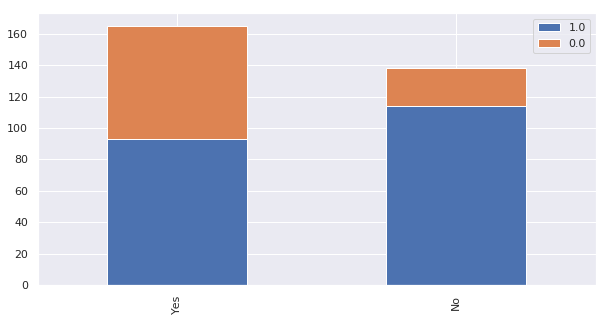

In [7]:
bar_chart('sex')

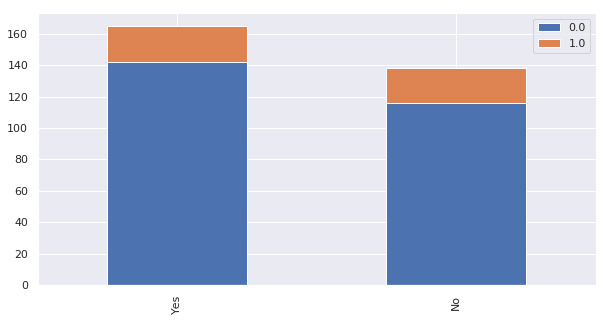

In [8]:
bar_chart('fbs')

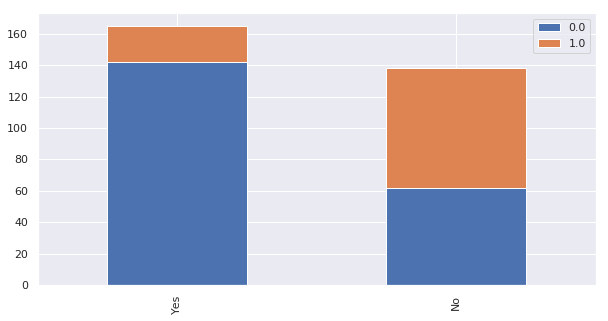

In [9]:
bar_chart('exang')

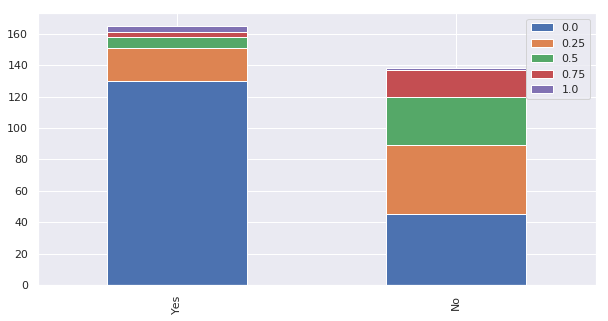

In [10]:
bar_chart('ca')

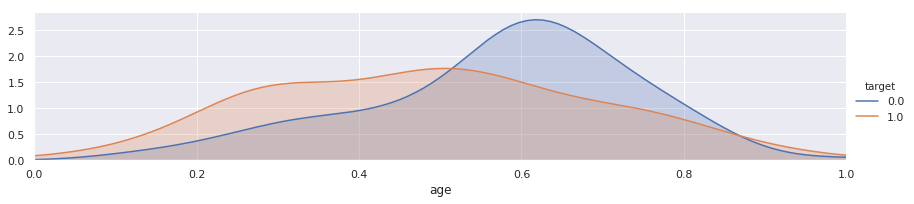

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

facet = sns.FacetGrid(heart, hue="target", aspect=4)
facet.map(sns.kdeplot, 'age', shade=True)
facet.set(xlim=(0, heart['age'].max()))
facet.add_legend()
sns.axes_style("darkgrid")

plt.show()

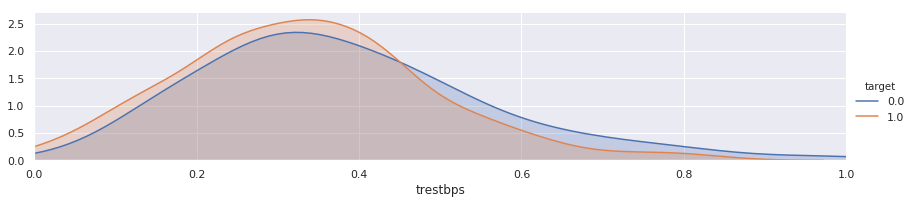

In [12]:
facet = sns.FacetGrid(heart, hue="target", aspect=4)
facet.map(sns.kdeplot, 'trestbps', shade=True)
facet.set(xlim=(0, heart['trestbps'].max()))
facet.add_legend()
sns.axes_style("darkgrid")

plt.show()

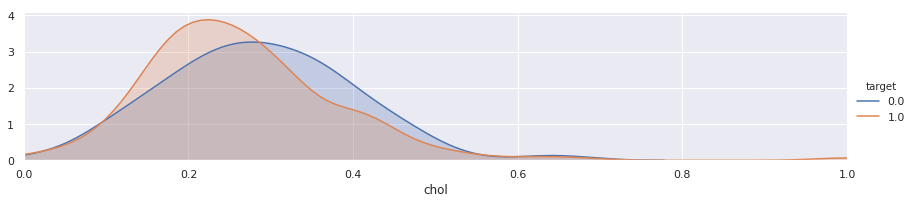

In [13]:
facet = sns.FacetGrid(heart, hue="target", aspect=4)
facet.map(sns.kdeplot, 'chol', shade=True)
facet.set(xlim=(0, heart['chol'].max()))
facet.add_legend()
sns.axes_style("darkgrid")

plt.show()

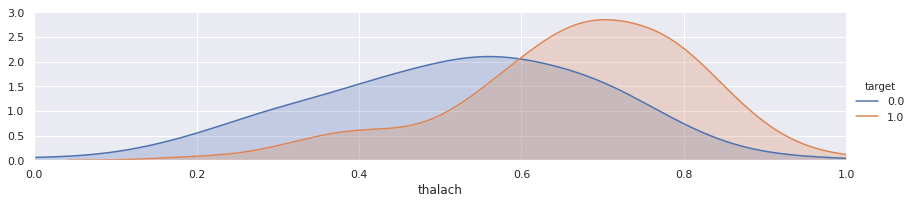

In [14]:
facet = sns.FacetGrid(heart, hue="target", aspect=4)
facet.map(sns.kdeplot, 'thalach', shade=True)
facet.set(xlim=(0, heart['thalach'].max()))
facet.add_legend()
sns.axes_style("darkgrid")

plt.show()

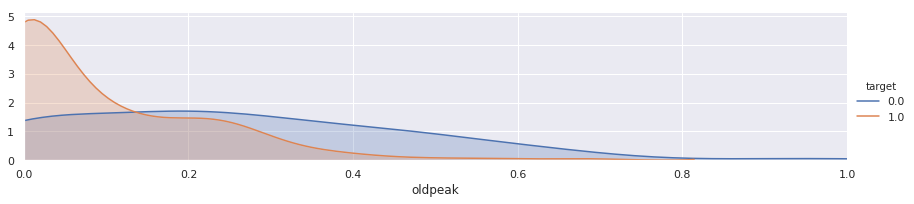

In [15]:
facet = sns.FacetGrid(heart, hue="target", aspect=4)
facet.map(sns.kdeplot, 'oldpeak', shade=True)
facet.set(xlim=(0, heart['oldpeak'].max()))
facet.add_legend()
sns.axes_style("darkgrid")

plt.show()

In [16]:
heart.corr()

,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,...,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target
cp_0,1.000000,-0.420274,-0.599986,-0.270952,0.004581,0.098025,-0.349920,0.309357,0.028350,0.237724,...,0.138253,0.089621,0.021447,0.070684,-0.060190,-0.376561,0.469061,0.280243,0.218226,-0.516015
cp_1,-0.420274,1.000000,-0.282135,-0.127412,-0.036237,-0.036496,0.207354,-0.188225,-0.051298,-0.197994,...,-0.147399,-0.041249,-0.081851,-0.012750,-0.060649,0.248317,-0.233863,-0.277513,-0.134715,0.245879
cp_2,-0.599986,-0.282135,1.000000,-0.181894,0.038353,-0.097775,0.210130,-0.173717,-0.029576,-0.105320,...,-0.059432,-0.116588,-0.045107,-0.037918,0.083679,0.165475,-0.271028,-0.132444,-0.088998,0.316742
cp_3,-0.270952,-0.127412,-0.181894,1.000000,-0.023362,0.033404,0.009998,-0.022554,0.068981,0.009321,...,0.047516,0.088043,0.151343,-0.050589,0.055511,0.079082,-0.093384,0.086959,-0.070496,0.086957
thal_0,0.004581,-0.036237,0.038353,-0.023362,1.000000,-0.020485,-0.089727,-0.064650,-0.022244,0.006205,...,-0.016779,-0.032093,-0.016870,-0.057127,0.080568,-0.050429,0.030113,-0.037946,-0.058236,-0.007293
thal_1,0.098025,-0.036496,-0.097775,0.033404,-0.020485,1.000000,-0.276635,-0.199320,0.096339,0.131149,...,0.063758,0.141135,0.076369,-0.093560,0.091351,-0.159748,0.063073,0.104635,0.066618,-0.106589
thal_2,-0.349920,0.207354,0.210130,0.009998,-0.089727,-0.276635,1.000000,-0.873032,-0.091512,-0.275318,...,-0.135891,-0.376365,-0.140712,-0.004591,-0.086774,0.294801,-0.328539,-0.339086,-0.221331,0.527334
thal_3,0.309357,-0.188225,-0.173717,-0.022554,-0.064650,-0.199320,-0.873032,1.000000,0.050474,0.216740,...,0.110752,0.321559,0.109573,0.059621,0.030953,-0.215417,0.300223,0.302145,0.203601,-0.486112
slope_0,0.028350,-0.051298,-0.029576,0.068981,-0.022244,0.096339,-0.091512,0.050474,1.000000,-0.252904,...,0.030536,0.046183,0.122384,-0.045340,0.105284,-0.056590,0.059253,0.394253,-0.042218,-0.063554
slope_1,0.237724,-0.197994,-0.105320,0.009321,0.006205,0.131149,-0.275318,0.216740,-0.252904,1.000000,...,0.177201,-0.009157,0.025207,0.051177,-0.033360,-0.419627,0.257687,0.310986,0.141923,-0.362053


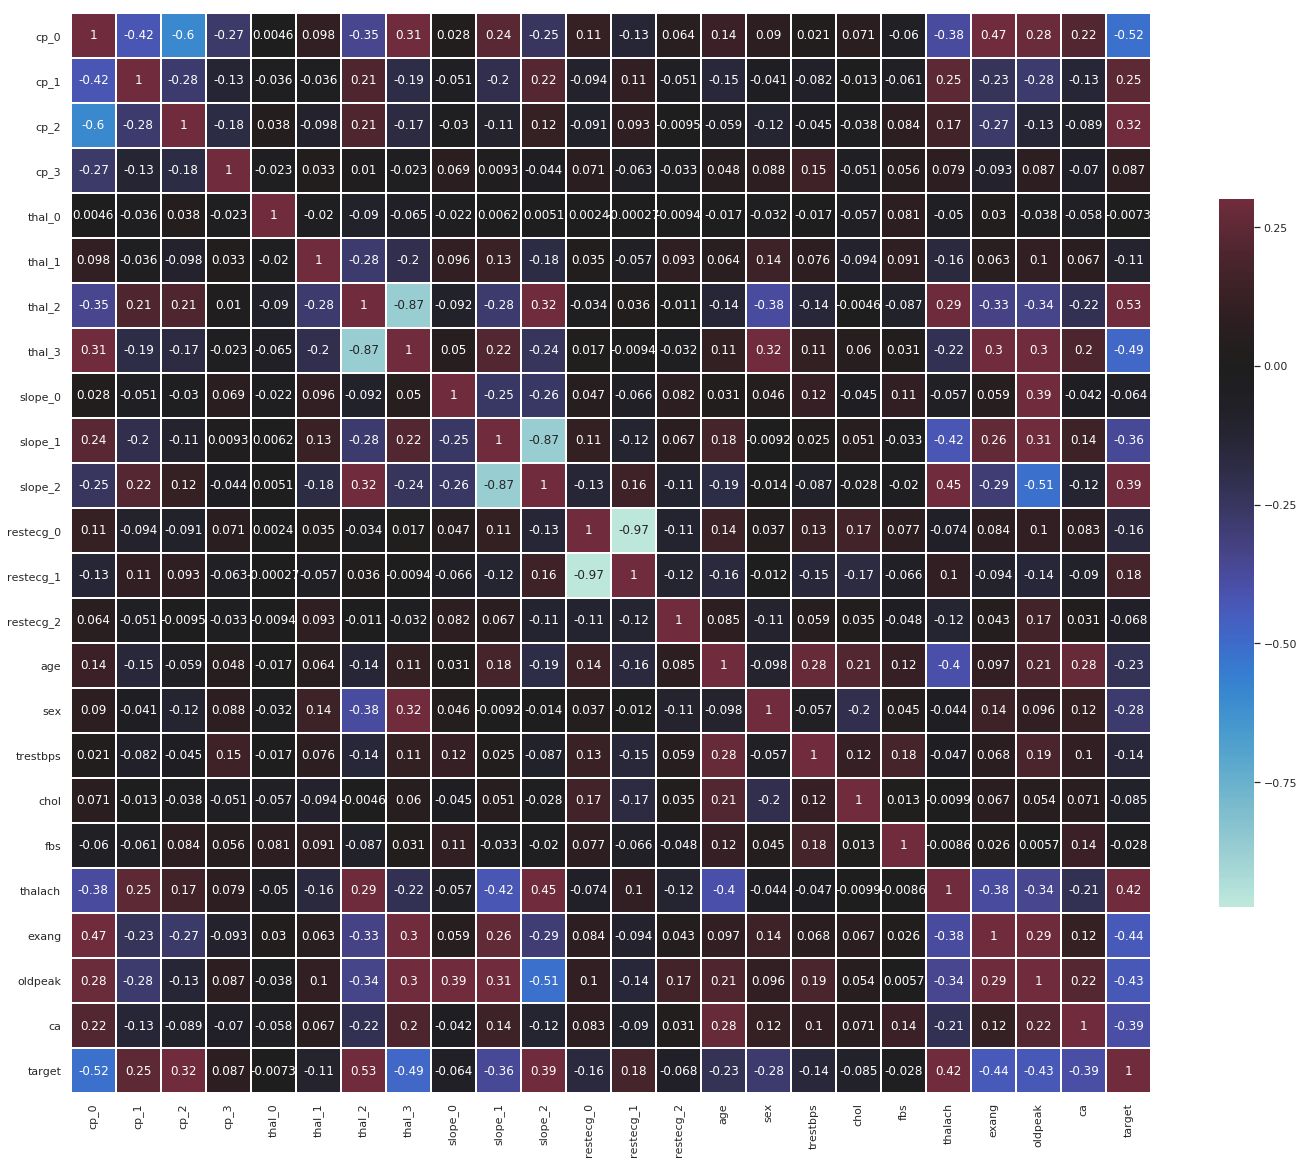

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(heart.corr(),vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.tight_layout()
plt.show()

In [18]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

In [19]:

x_heart = heart_train.drop(['target'], axis=1)
y_heart = heart_train['target']
x2_heart = heart_test.drop(['target'], axis=1)
y2_heart = heart_test['target']
from sklearn.model_selection import cross_val_score

In [20]:
l1r = LogisticRegression(penalty = 'l1', C=0.65)
l1r.fit(x_heart, y = y_heart)
score = cross_val_score(l1r, heart.drop(['target'], axis=1), heart['target'], cv=5)
print("testset accuracy:",l1r.score(x2_heart, y2_heart))
print("cross validation accuracy:",score.mean())

testset accuracy: 0.8852459016393442
cross validation accuracy: 0.8281967213114754


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [21]:
l2r = LogisticRegression(penalty = 'l2', C=1)
l2r.fit(x_heart, y = y_heart)
score = cross_val_score(l2r, heart.drop(['target'], axis=1), heart['target'], cv=5)
print("testset accuracy:",l2r.score(x2_heart, y2_heart))
print("cross validation accuracy:",score.mean())

testset accuracy: 0.8688524590163934
cross validation accuracy: 0.8281420765027322


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [22]:
svc = SVC(C=0.35)
score = cross_val_score(svc, heart.drop(['target'], axis=1), heart['target'], cv=5)
svc.fit(x_heart, y_heart)
print("testset accuracy:",svc.score(x2_heart, y2_heart))
print("cross validation accuracy:",score.mean())

testset accuracy: 0.8688524590163934
cross validation accuracy: 0.8216939890710382


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default 

In [23]:
lsvc = SVC(kernel='linear', C=0.8)
lsvc.fit(x_heart, y = y_heart)
score = cross_val_score(lsvc, heart.drop(['target'], axis=1), heart['target'], cv=5)
print("testset accuracy:",lsvc.score(x2_heart, y2_heart))
print("cross validation accuracy:",score.mean())


testset accuracy: 0.8688524590163934
cross validation accuracy: 0.8349726775956284


In [24]:
dt = DecisionTreeClassifier()
dt.fit(x_heart, y = y_heart)
score = cross_val_score(dt, heart.drop(['target'], axis=1), heart['target'], cv=5)
print("testset accuracy:",dt.score(x2_heart, y2_heart))
print("cross validation accuracy:",score.mean())

testset accuracy: 0.7704918032786885
cross validation accuracy: 0.7256830601092895


In [25]:
rf = RandomForestClassifier(n_estimators = 1000)
rf.fit(x_heart, y = y_heart)
score = cross_val_score(rf, heart.drop(['target'],axis=1), heart['target'], cv=5)
print("testset accuracy:",rf.score(x2_heart, y2_heart))
print("cross validation accuracy:",score.mean())

testset accuracy: 0.9016393442622951
cross validation accuracy: 0.8283060109289618


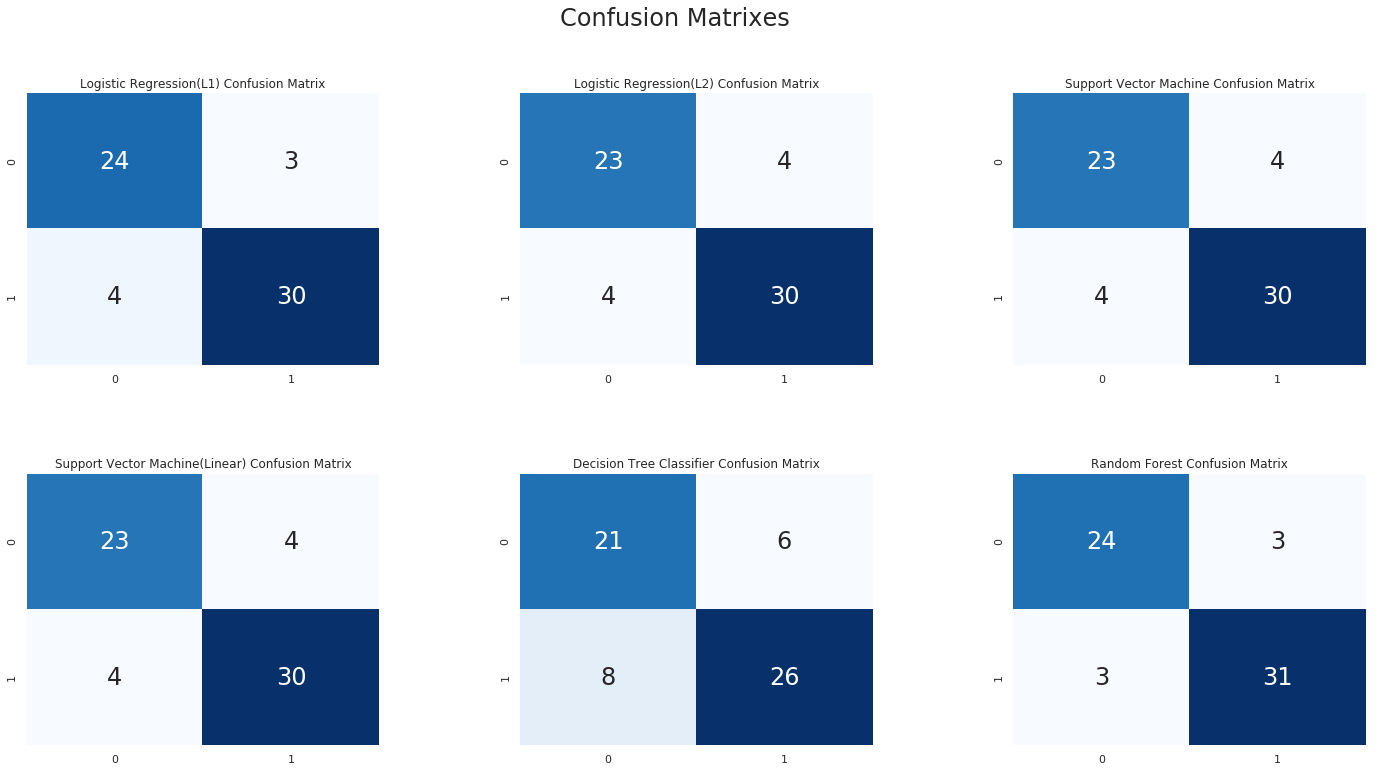

In [26]:
y_head_l1r = l1r.predict(x2_heart)
y_head_l2r = l2r.predict(x2_heart)
y_head_svc = svc.predict(x2_heart)
y_head_lsvc = lsvc.predict(x2_heart)
y_head_dt = dt.predict(x2_heart)
y_head_rf = rf.predict(x2_heart)
from sklearn.metrics import confusion_matrix
cm_l1r = confusion_matrix(y2_heart,y_head_l1r)
cm_l2r = confusion_matrix(y2_heart,y_head_l2r)
cm_svc = confusion_matrix(y2_heart,y_head_svc)
cm_lsvc = confusion_matrix(y2_heart,y_head_lsvc)
cm_dt = confusion_matrix(y2_heart,y_head_dt)
cm_rf = confusion_matrix(y2_heart,y_head_rf)

plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression(L1) Confusion Matrix")
sns.heatmap(cm_l1r,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("Logistic Regression(L2) Confusion Matrix")
sns.heatmap(cm_l2r,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Support Vector Machine(Linear) Confusion Matrix")
sns.heatmap(cm_lsvc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dt,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

Sensitivity :  0.8571428571428571
Specificity :  0.9090909090909091


0.8856209150326797

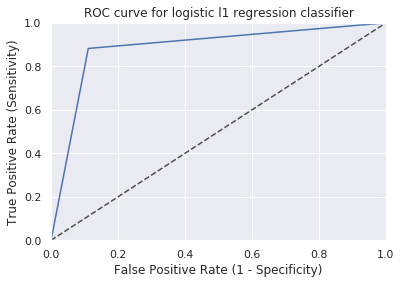

In [27]:
from sklearn.metrics import roc_curve, auc #for model evaluation
total=sum(sum(cm_l1r))

sensitivity = cm_l1r[0,0]/(cm_l1r[0,0]+cm_l1r[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm_l1r[1,1]/(cm_l1r[1,1]+cm_l1r[0,1])
print('Specificity : ', specificity)
fpr, tpr, thresholds = roc_curve(y2_heart, y_head_l1r)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for logistic l1 regression classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
auc(fpr, tpr)

Sensitivity :  0.8518518518518519
Specificity :  0.8823529411764706


0.8671023965141612

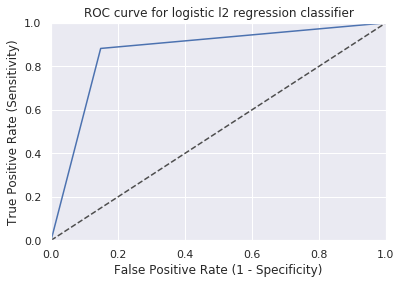

In [28]:
total=sum(sum(cm_l2r))

sensitivity = cm_l2r[0,0]/(cm_l2r[0,0]+cm_l2r[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm_l2r[1,1]/(cm_l2r[1,1]+cm_l2r[0,1])
print('Specificity : ', specificity)
fpr, tpr, thresholds = roc_curve(y2_heart, y_head_l2r)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for logistic l2 regression classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
auc(fpr, tpr)

Sensitivity :  0.8518518518518519
Specificity :  0.8823529411764706


0.8671023965141612

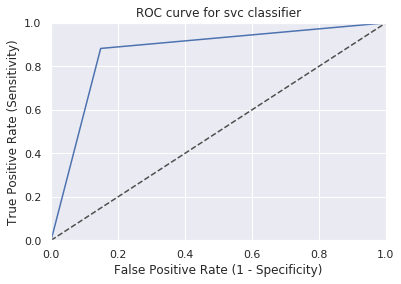

In [29]:
total=sum(sum(cm_svc))

sensitivity = cm_svc[0,0]/(cm_svc[0,0]+cm_svc[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm_svc[1,1]/(cm_svc[1,1]+cm_svc[0,1])
print('Specificity : ', specificity)
fpr, tpr, thresholds = roc_curve(y2_heart, y_head_svc)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for svc classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
auc(fpr, tpr)

Sensitivity :  0.8518518518518519
Specificity :  0.8823529411764706


0.8671023965141612

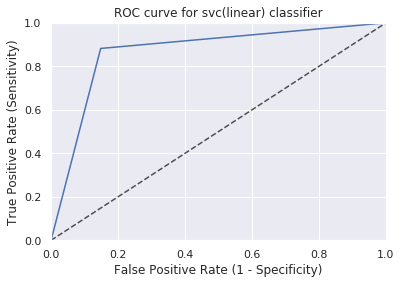

In [30]:
total=sum(sum(cm_lsvc))

sensitivity = cm_lsvc[0,0]/(cm_lsvc[0,0]+cm_lsvc[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm_lsvc[1,1]/(cm_lsvc[1,1]+cm_lsvc[0,1])
print('Specificity : ', specificity)
fpr, tpr, thresholds = roc_curve(y2_heart, y_head_lsvc)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for svc(linear) classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
auc(fpr, tpr)

Sensitivity :  0.7241379310344828
Specificity :  0.8125


0.7712418300653595

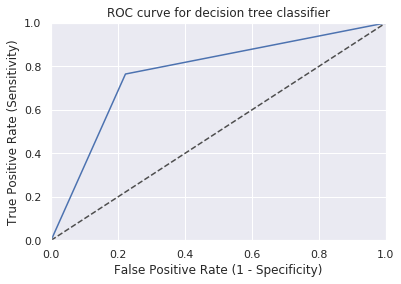

In [31]:
total=sum(sum(cm_dt))

sensitivity = cm_dt[0,0]/(cm_dt[0,0]+cm_dt[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm_dt[1,1]/(cm_dt[1,1]+cm_dt[0,1])
print('Specificity : ', specificity)
fpr, tpr, thresholds = roc_curve(y2_heart, y_head_dt)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for decision tree classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
auc(fpr, tpr)

Sensitivity :  0.8888888888888888
Specificity :  0.9117647058823529


0.9003267973856208

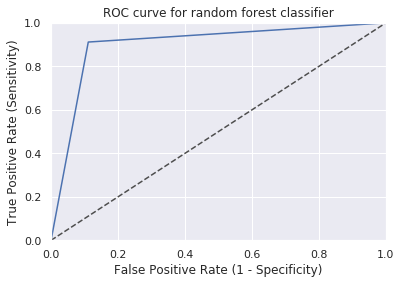

In [32]:
total=sum(sum(cm_rf))

sensitivity = cm_rf[0,0]/(cm_rf[0,0]+cm_rf[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm_rf[1,1]/(cm_rf[1,1]+cm_rf[0,1])
print('Specificity : ', specificity)
fpr, tpr, thresholds = roc_curve(y2_heart, y_head_rf)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for random forest classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
auc(fpr, tpr)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.
sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.


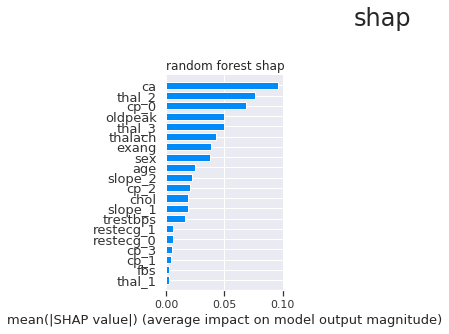

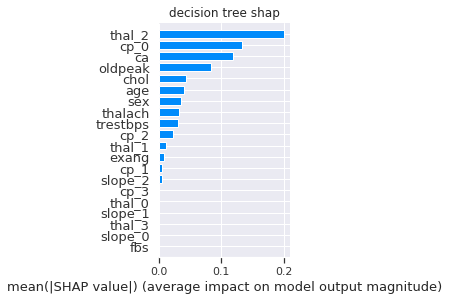

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

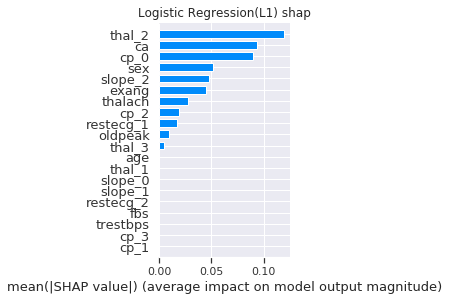

In [33]:
import shap



explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(x_heart)
shap.initjs()
#shap.force_plot(explainer.expected_value[1], shap_values[1], x_heart)


plt.figure(figsize=(24,12))

plt.suptitle("shap",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("random forest shap")
shap.summary_plot(shap_values[1], x_heart, plot_type="bar")
explainer = shap.TreeExplainer(dt)
shap_values = explainer.shap_values(x_heart)
plt.subplot(2,3,2)
plt.title("decision tree shap")
shap.summary_plot(shap_values[1], x_heart, plot_type="bar")

explainer = shap.KernelExplainer(l1r.predict_proba, x_heart)
shap_values = explainer.shap_values(x_heart)
plt.subplot(2,3,3)
plt.title("Logistic Regression(L1) shap")
shap.summary_plot(shap_values[1], x_heart, plot_type="bar")
plt.show()